In [1]:
import cv2
import numpy as np
import glob
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('..')
from constant import PATHS
import pandas as pd

In [2]:
df = pd.read_csv(PATHS.TRAIN_CSV)

In [3]:
df = df.replace(to_replace=3, value=1 )


In [9]:
df.to_csv(PATHS.TRAIN_CSV)

In [4]:
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
5057    0
5058    2
5059    0
5060    2
5061    0
Name: label, Length: 5062, dtype: int64

In [8]:
df

,image,label
0,1618198435.300621.0.jpg,0
1,1618198442.8838162.0.jpg,0
2,1618198443.5479355.3.jpg,0
3,1618198444.1551747.0.jpg,0
4,1618198445.5639067.0.jpg,0
...,...,...
5057,1618212700.7874596.0.jpg,0
5058,1618212701.1793287.2.jpg,2
5059,1618212701.9952593.0.jpg,0
5060,1618212703.6914518.2.jpg,2


In [5]:
df_2 = df[df['label']==2]
df_3 = df[df['label']==1]

In [6]:
df = df.append([df_2]*2,ignore_index=True)
df = df.append([df_3]*2,ignore_index=True)

In [7]:
df

,image,label
0,1618198435.300621.0.jpg,0
1,1618198442.8838162.0.jpg,0
2,1618198443.5479355.3.jpg,1
3,1618198444.1551747.0.jpg,0
4,1618198445.5639067.0.jpg,0
...,...,...
9055,1618212683.25962.3.jpg,1
9056,1618212690.9152765.3.jpg,1
9057,1618212691.131414.3.jpg,1
9058,1618212691.443433.3.jpg,1


In [11]:
file_names = df.iloc[:,0]
labels = df.iloc[:,1]

In [6]:
file_names[-20:-1]

9040     1618212589.475429.3.jpg
9041     1618212599.394497.3.jpg
9042     1618212610.411314.3.jpg
9043    1618212610.6744952.3.jpg
9044    1618212617.7314775.3.jpg
9045     1618212622.843483.3.jpg
9046    1618212623.2903566.3.jpg
9047    1618212632.5873365.3.jpg
9048    1618212632.8344905.3.jpg
9049    1618212633.8833532.3.jpg
9050    1618212634.7544835.3.jpg
9051     1618212656.395291.3.jpg
9052    1618212657.4112995.3.jpg
9053     1618212658.355486.3.jpg
9054    1618212671.3716931.3.jpg
9055      1618212683.25962.3.jpg
9056    1618212690.9152765.3.jpg
9057     1618212691.131414.3.jpg
9058     1618212691.443433.3.jpg
Name: image, dtype: object

In [7]:
labels.value_counts()

2    3468
0    3063
3    2529
Name: label, dtype: int64

In [5]:
labels[-20:-1]

5041    0
5042    3
5043    0
5044    0
5045    2
5046    0
5047    0
5048    2
5049    0
5050    2
5051    0
5052    0
5053    2
5054    0
5055    2
5056    0
5057    2
5058    0
5059    2
Name: 0, dtype: int64

In [12]:
dim = 240*320
X = np.empty((0,dim))
y = np.empty((0, 3))
for file_name in file_names:
    file_path = os.path.join(PATHS.IMAGES, file_name)
    image = cv2.imread(file_path)
    print(file_path)
    if image is None:
        raise Exception('Image not found') 
    image = np.mean(image,axis=-1)
    image = image.reshape(dim,)
    X = np.vstack((X, image))
y = labels.to_numpy()
shape = (y.size, 3)

one_hot = np.zeros(shape)
rows = np.arange(y.size)
one_hot[rows, y] = 1
y = one_hot

data/images/1618198435.300621.0.jpg
data/images/1618198442.8838162.0.jpg
data/images/1618198443.5479355.3.jpg
data/images/1618198444.1551747.0.jpg
data/images/1618198445.5639067.0.jpg
data/images/1618198446.1320043.0.jpg
data/images/1618198446.5400834.3.jpg
data/images/1618198446.9959743.0.jpg
data/images/1618198447.3642921.3.jpg
data/images/1618198448.1239526.0.jpg
data/images/1618198448.4683268.3.jpg
data/images/1618198449.0439248.0.jpg
data/images/1618198449.4749625.3.jpg
data/images/1618198450.0040405.0.jpg
data/images/1618198450.7479398.0.jpg
data/images/1618198451.1879458.0.jpg
data/images/1618198451.7478282.0.jpg
data/images/1618198452.0685148.2.jpg
data/images/1618198452.643856.0.jpg
data/images/1618198452.8522854.2.jpg
data/images/1618198453.2672472.2.jpg
data/images/1618198453.675895.2.jpg
data/images/1618198454.396002.0.jpg
data/images/1618198454.9878333.0.jpg
data/images/1618198455.323054.2.jpg
data/images/1618198455.6919608.0.jpg
data/images/1618198456.059863.0.jpg
data/im

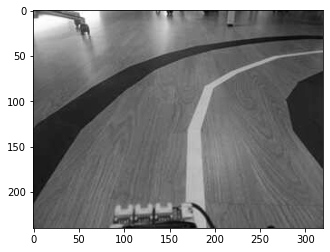

In [13]:
plt.imshow(X[0].reshape(240,320), cmap='gray')

In [14]:
X.shape

(9060, 76800)

In [7]:
y

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [15]:
model = cv2.ml.ANN_MLP_create()
layer_sizes = np.int32([dim, 32, 3])
model.setLayerSizes(layer_sizes)
model.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
model.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2, 1)
model.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 20, 0.01))

In [16]:
model.train(np.float32(X), cv2.ml.ROW_SAMPLE, np.float32(y))

True

In [17]:
ret, resp = model.predict(X)
prediction = resp.argmax(-1)
true_labels = y.argmax(-1)
train_rate = np.mean(prediction == true_labels)
print (len(prediction))
print (prediction)
print ('Train accuracy: ', "{0:.2f}%".format(train_rate * 100))

9060
[1 1 1 ... 1 1 1]
Train accuracy:  80.81%


In [12]:
true_labels

array([2, 0, 0, ..., 2, 2, 3])

In [13]:
prediction

array([1, 0, 0, ..., 0, 0, 0])

In [18]:
model.save(PATHS.MODEL)
model = cv2.ml.ANN_MLP_load(PATHS.MODEL)

In [22]:
PATHS.MODEL

'model/model.xml'

In [12]:
model = cv2.ml.ANN_MLP_load(PATHS.MODEL)

In [16]:
X.shape

(2867, 76800)